#Q1

In [ ]:
import numpy as np
from numpy import ndarray
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.integrate import quad
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

#Rishabh Saxena
#DS 4400 w/ Prof. Chieh Wu
#Machine Learning Exam #1

In [ ]:
#Get data from csv's
X = genfromtxt('problem_1_data.csv', delimiter=',')
y = genfromtxt('problem_1_label.csv', delimiter=',')
X = X.reshape(-1,1)
y = y.reshape(-1,1)

phi = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)
#phi takes form [1, x, x^2] so w = [c, b, a]

In [ ]:
#2) Closed Form solution
def closed_form_solution(phi, y):
  return np.linalg.inv(phi.T.dot(phi)).dot(phi.T.dot(y))
print ('[c, b, a] = \n', closed_form_solution(phi, y))

[c, b, a] = 
 [[ 4.0134]
 [-0.5817]
 [ 1.0662]]


Text(0.5, 1.0, 'Plotting Points and Polynomial Best Fit')

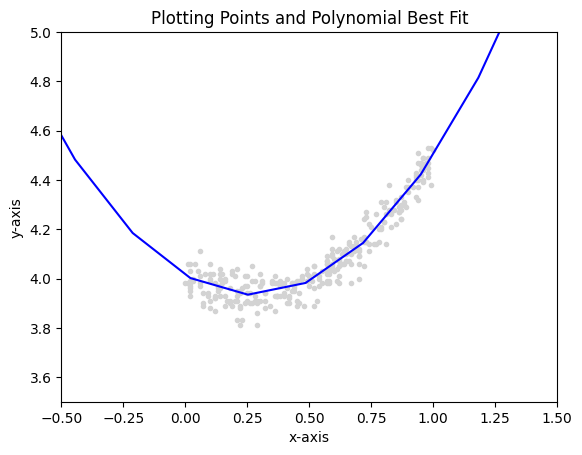

In [ ]:
#3) Scatter Plot and f(x)
import matplotlib.pyplot as plt
# plot points
plt.scatter(X, y, color='lightgrey', marker='.', label='Points')

# get line
x_line = np.linspace(-3, 20, 100)
w = closed_form_solution(phi, y)
y_line = closed_form_solution(phi, y)[2]*x_line*x_line + closed_form_solution(phi, y)[1]*x_line + closed_form_solution(phi, y)[0]


# plot line
plt.plot(x_line, y_line, linestyle='-', color='blue')

# set x-axis and y-axis range
plt.xlim(-0.5, 1.5)
plt.ylim(3.5, 5)

# labels
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plotting Points and Polynomial Best Fit')

#Q2

In [1]:
#1) Split into train (0.8), test(0.1), and validation(0.1)
import numpy as np
from numpy import reshape, arange, array, hstack
from sklearn.model_selection import train_test_split

#Get data from csv's
X = genfromtxt('problem_2_data.csv', delimiter=',')
y = genfromtxt('problem_2_label.csv', delimiter=',')

stock_price.csv
y = y.reshape(-1,1)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

NameError: name 'genfromtxt' is not defined

In [ ]:
#2) Preprocessing
#use standard scaler to normalize the data, use scaler fitted on training to ensure val and test aren't used to train model
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#3) Gradient Descent
#mse
def mse(y, y_hat):
  return np.mean((y - y_hat)**2)

#predict
def predict(w, phi):
  return phi.dot(w)

#grad
def f_grad(w, phi, y):
  n = phi.size
  return (2/n) * phi.T.dot(phi.dot(w) - y)

def gradient_descent(type_of_model, X, y, type_of_data, num_iter=10000, eta = 0.01, plot=True):
  #Make feature map based on type of model
  if type_of_model == 'linear':
    phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(X)
  elif type_of_model == 'second order polynomial':
    phi = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)

  #set new w
  w = np.zeros((phi.shape[1], 1))

  #mse gathering and grad descent
  mse_list = []
  for i in range(num_iter):
    w -= eta * f_grad(w, phi, y)
    mse_list.append(mse(y,predict(w,phi)))
  if plot:
    #mse plotting
    plt.plot(mse_list)
    plt.title('MSE over GD')
    plt.xlabel('steps')
    plt.ylabel('MSE')
    plt.show()
    print(type_of_model, 'MSE for', type_of_data + ':', mse(y, predict(w, phi)))
  return w

def print_MSE(type_of_model, w, X, y, type_of_data):
    #Make feature map based on type of model
  if type_of_model == 'linear':
    phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(X)
  elif type_of_model == 'second order polynomial':
    phi = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)
  print(type_of_model, 'MSE for', type_of_data + ':', mse(y, predict(w, phi)))



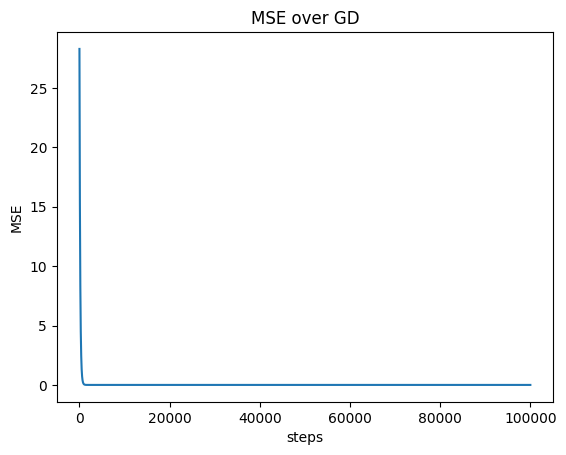

linear MSE for training: 0.0023282579832340482
linear MSE for test: 0.00330785142315227
linear MSE for validation: 0.002126339619459956


In [ ]:
gradient_descent_w_on_training = gradient_descent('linear', X_train, y_train, 'training')
print_MSE('linear', gradient_descent_w_on_training, X_test, y_test, 'test')
print_MSE('linear', gradient_descent_w_on_training, X_val, y_val, 'validation')

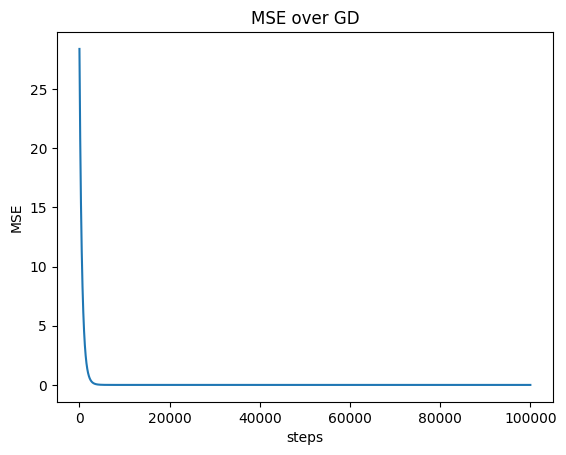

second order polynomial MSE for training: 0.002277331170844214
second order polynomial MSE for test: 0.0033732481145012693
second order polynomial MSE for validation: 0.0020617894813259267


In [ ]:
gradient_descent_w_on_training = gradient_descent('second order polynomial', X_train, y_train, 'training')
print_MSE('second order polynomial', gradient_descent_w_on_training, X_test, y_test, 'test')
print_MSE('second order polynomial', gradient_descent_w_on_training, X_val, y_val, 'validation')

FINAL DECISION ON MODEL:
I would pick the linear model since it generalizes better to the unseen data with a lower error on validation and test data over the same amount of steps.

#Q3

In [ ]:
X = genfromtxt('lunch_wait_time.csv', delimiter=',')
X = X.reshape(-1,1)

Closed form solution:



> f(theta) = -n * ln(theta) + theta * sum(x_i)

> f_grad(theta) = -n * 1/theta + sum(x_i)

> closed form -> 0 = -n * 1/theta + sum(x_i)

> -sum(x_i)/-n = 1/theta

> n/sum(x_i) = theta

In [ ]:
#1) Closed Form Solution
def closed_form_solution():
  n = X.size
  return n/np.sum(X)
closed_form_solution()

0.9610764055742432

In [ ]:
#2) Gradient Descent
#mse
def objective(theta, X):
  n = X.size
  return -n * np.log(theta) + theta * np.sum(X)

#grad
def f_grad(theta, X):
  n = X.size
  return -n/theta + np.sum(X)

def gradient_descent(X, num_iter=10000, eta = 0.001):
  #set new w
  theta = np.array([1])

  #mse gathering and grad descent
  for i in range(num_iter):
    theta = theta - eta * f_grad(theta, X)
  print('theta value:', theta)

gradient_descent(X)



theta value: [0.9611]


In [ ]:
#3) Population Mean, Variance, Standard Deviation
def mean():
  f0 = 0
  for xi in X:
    f0 += xi
  return f0/X.size
print('Population Mean:', mean(), 'or', np.mean(X))
mu = mean()
def variance():
  f0 = 0
  for xi in X:
    f0 += (xi - mu)**2
  return f0/X.size
print('Population Variance:', variance(), 'or', np.var(X))
def std_dev():
  return np.sqrt(variance())
print('Population Standard Deviation:', std_dev(), 'or', np.std(X))

Population Mean: [1.0405] or 1.0405
Population Variance: [1.0283] or 1.0283297500000002
Population Standard Deviation: [1.0141] or 1.0140659495318833


#Q4

In [ ]:
A = np.array([[1, 1, 1],
              [4, 2, 1],
              [9, 3, 1],
              [16, 4, 1]])
y = np.array([[2],
             [4],
             [8],
             [14]])
#1) Gradient Descent
#objective
def objective(w, A, y):
  return (A.dot(w) - y)**2

#grad
def f_grad(w, A, y):
  return 2 * A.T.dot((A.dot(w)-y))

def gradient_descent(A, y, num_iter=100000, eta = 0.001):
  #set new w
  w = np.zeros((A.shape[1],1))

  #mse gathering and grad descent
  objective_list = []
  for i in range(num_iter):
    w = w - eta * f_grad(w, A, y)
    objective_list.append(objective(w, A, y))

  print('w value:', w)

gradient_descent(A, y)




w value: [[ 1.]
 [-1.]
 [ 2.]]


Closed Form Solution:

>  f_grad(w) = A.T(2 * Aw - y)

> 0 = 2 * A.T * (Aw - y)

> 0 = A.T(Aw) - A.Ty

> A.Ty = = A.T(Aw)

> A.Ty = A.TAw

> (A.TA)^-1 * (A.Ty) = w

In [ ]:
#2) Closed Form
def closed_form_solution(A, y):
  return np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))
print('w value:', closed_form_solution(A, y))

w value: [[ 1.]
 [-1.]
 [ 2.]]
